In [181]:
import numpy as np                                       # fast vectors and matrices                           
import scipy as sp                                       # various numerical stuff
import scipy.stats                                       # statistics
import matplotlib.pyplot as plt                          # plotting
from IPython.display import display,Math,Latex,Audio     # rich media

from numpy import log
from scipy.stats import norm
from sklearn import linear_model

# inline plots
%matplotlib inline 

# Fake data

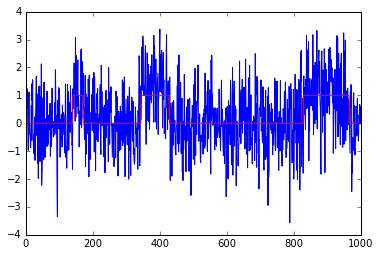

In [202]:
length = 1000
p = .995
mu = 1
#Y = np.zeros(length+1)
X = np.zeros(length)
#Y[0] = 0
for i in range(X.size):
    #Y[i+1] = Y[i] if np.random.binomial(2,1-p) == 0 else 1-X[i]
    X[i] = mu*Y[i] + np.random.randn(1)

#Y = Y[0:length]
    
plt.plot(X,color='b')
plt.plot(mu*Y,color='r')

# HMM

In [206]:
def approx_eq(x,y,epsilon):
    return abs(x - y) < epsilon

L = np.zeros([1000,2])
L[0,0] = log(norm.pdf(X[0],0,1))
L[0,1] = log(norm.pdf(X[1],mu,1))
for i in range(length):
    py0 = log(norm.pdf(X[i],0,1))
    py1 = log(norm.pdf(X[i],mu,1))

    L[i,0] = max(py0 + log(p) + L[i-1,0],py0 + log(1-p) + L[i-1,1])
    L[i,1] = max(py1 + log(1-p) + L[i-1,0],py1 + log(p) + L[i-1,1])

Yhat = np.zeros(length, dtype=np.int32)
Yhat[length-1] = np.argmax([L[length-1,0],L[length-1,1]])
for i in reversed(range(Y.size-1)):
    py = [log(norm.pdf(X[i+1],0,1)), log(norm.pdf(X[i+1],mu,1))]
    
    if L[i+1,Yhat[i+1]] == py[Yhat[i+1]] + log(p) + L[i,Yhat[i+1]]:
        Yhat[i] = Yhat[i+1]
    elif L[i+1,Yhat[i+1]] == py[Yhat[i+1]] + log(1-p) + L[i,1-Yhat[i+1]]:
        Yhat[i] = 1-Yhat[i+1]
    else: assert False


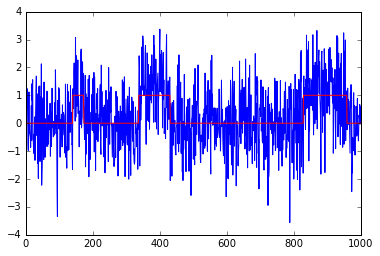

In [207]:
plt.plot(X,color='b')
plt.plot(mu*Yhat,color='r')

# Logistic regression

In [349]:
features = X.reshape(-1,1)

logit = linear_model.LogisticRegression(verbose=1)
logit.fit(features,Y)
print logit.coef_

pred = logit.predict_proba(features)
Yhat = np.empty(length)
for i in range(length):
    Yhat[i] = np.argmax(pred[i])

[LibLinear][[ 1.16769414]]


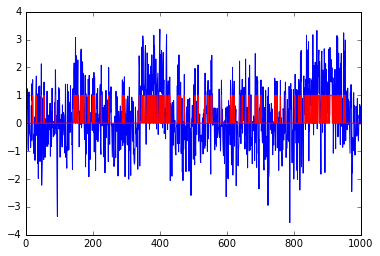

In [350]:
plt.plot(X,color='b')
plt.plot(mu*Yhat,color='r')

# MEMM

In [357]:
p = .7

L = np.zeros([1000,2])
L[0,0] = log(pred[0,0])
L[0,1] = log(pred[0,1])
for i in range(length):
    py0 = log(pred[i,0])
    py1 = log(pred[i,1])

    L[i,0] = max(py0 + log(p) + L[i-1,0],py0 + log(1-p) + L[i-1,1])
    L[i,1] = max(py1 + log(1-p) + L[i-1,0],py1 + log(p) + L[i-1,1])

Yhat = np.zeros(length, dtype=np.int32)
Yhat[length-1] = np.argmax([L[length-1,0],L[length-1,1]])
for i in reversed(range(length-1)):
    py = [log(pred[i+1,0]), log(pred[i+1,1])]
    
    if L[i+1,Yhat[i+1]] == py[Yhat[i+1]] + log(p) + L[i,Yhat[i+1]]:
        Yhat[i] = Yhat[i+1]
    elif L[i+1,Yhat[i+1]] == py[Yhat[i+1]] + log(1-p) + L[i,1-Yhat[i+1]]:
        Yhat[i] = 1-Yhat[i+1]
    else: assert False

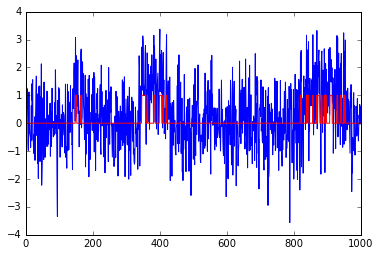

In [358]:
plt.plot(X,color='b')
plt.plot(mu*Yhat,color='r')

# CRF

In [362]:
# 5-frame features
features = np.empty([length,5])
for i in range(length):
    if i < 1:
        features[i,0] = X[i]
        features[i,1] = X[i]
        features[i,2] = X[i]
        features[i,3] = X[i+1]
        features[i,4] = X[i+2]
    elif i < 2:
        features[i,0] = X[i-1]
        features[i,1] = X[i-1]
        features[i,2] = X[i]
        features[i,3] = X[i+1]
        features[i,4] = X[i+2]
    elif i > length-2:
        features[i,0] = X[i-2]
        features[i,1] = X[i-1]
        features[i,2] = X[i]
        features[i,3] = X[i]
        features[i,4] = X[i]
    elif i > length-3:
        features[i,0] = X[i-2]
        features[i,1] = X[i-1]
        features[i,2] = X[i]
        features[i,3] = X[i+1]
        features[i,4] = X[i+1]
    else:
        features[i,0] = X[i-2]
        features[i,1] = X[i-1]
        features[i,2] = X[i]
        features[i,3] = X[i+1]
        features[i,4] = X[i+2]
        
logit = linear_model.LogisticRegression(verbose=1)
logit.fit(features,Y)
print logit.coef_

pred = logit.predict_proba(features)
Yhat = np.empty(length)
for i in range(length):
    Yhat[i] = np.argmax(pred[i])

[LibLinear][[ 1.11114113  1.0614828   1.1933702   1.1405739   1.19035518]]


In [363]:
p = .999

L = np.zeros([1000,2])
L[0,0] = log(pred[0,0])
L[0,1] = log(pred[0,1])
for i in range(length):
    py0 = log(pred[i,0])
    py1 = log(pred[i,1])

    L[i,0] = max(py0 + log(p) + L[i-1,0],py0 + log(1-p) + L[i-1,1])
    L[i,1] = max(py1 + log(1-p) + L[i-1,0],py1 + log(p) + L[i-1,1])

Yhat = np.zeros(length, dtype=np.int32)
Yhat[length-1] = np.argmax([L[length-1,0],L[length-1,1]])
for i in reversed(range(length-1)):
    py = [log(pred[i+1,0]), log(pred[i+1,1])]
    
    if L[i+1,Yhat[i+1]] == py[Yhat[i+1]] + log(p) + L[i,Yhat[i+1]]:
        Yhat[i] = Yhat[i+1]
    elif L[i+1,Yhat[i+1]] == py[Yhat[i+1]] + log(1-p) + L[i,1-Yhat[i+1]]:
        Yhat[i] = 1-Yhat[i+1]
    else: assert False

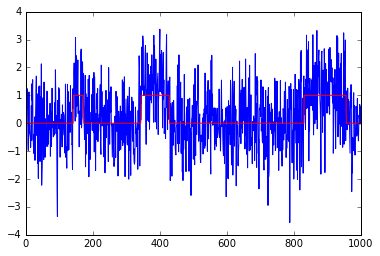

In [364]:
plt.plot(X,color='b')
plt.plot(mu*Yhat,color='r')

# Softmax

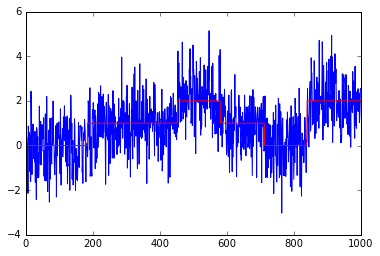

In [398]:
p = .995

transitions = np.random.randint(3,size=length)

Y2 = np.zeros(length+1)
X = np.zeros(length)
Y2[0] = 0
for i in range(X.size):
    Y2[i+1] = Y2[i] if np.random.binomial(2,1-p) == 0 else transitions[i]
    X[i] = Y2[i] + np.random.randn(1)

Y2 = Y2[0:length]
    
plt.plot(X,color='b')
plt.plot(Y2,color='r')

In [399]:
features = X.reshape(-1,1)

logit = linear_model.LogisticRegression(verbose=1,multi_class='ovr')
logit.fit(features,Y2)
print logit.coef_

pred = logit.predict_proba(features)
Yhat = np.empty(length)
for i in range(length):
    Yhat[i] = np.argmax(pred[i])

[LibLinear][[-1.12447032]
 [-0.05893419]
 [ 1.38380953]]


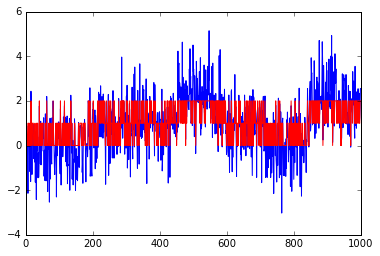

In [400]:
plt.plot(X,color='b')
plt.plot(Yhat,color='r')

In [402]:
# 5-frame features
features = np.empty([length,5])
for i in range(length):
    if i < 1:
        features[i,0] = X[i]
        features[i,1] = X[i]
        features[i,2] = X[i]
        features[i,3] = X[i+1]
        features[i,4] = X[i+2]
    elif i < 2:
        features[i,0] = X[i-1]
        features[i,1] = X[i-1]
        features[i,2] = X[i]
        features[i,3] = X[i+1]
        features[i,4] = X[i+2]
    elif i > length-2:
        features[i,0] = X[i-2]
        features[i,1] = X[i-1]
        features[i,2] = X[i]
        features[i,3] = X[i]
        features[i,4] = X[i]
    elif i > length-3:
        features[i,0] = X[i-2]
        features[i,1] = X[i-1]
        features[i,2] = X[i]
        features[i,3] = X[i+1]
        features[i,4] = X[i+1]
    else:
        features[i,0] = X[i-2]
        features[i,1] = X[i-1]
        features[i,2] = X[i]
        features[i,3] = X[i+1]
        features[i,4] = X[i+2]
        
logit = linear_model.LogisticRegression(verbose=1,multi_class='ovr')
logit.fit(features,Y2)
print logit.coef_

pred = logit.predict_proba(features)
Yhat = np.empty(length)
for i in range(length):
    Yhat[i] = np.argmax(pred[i])

[LibLinear][[-0.88378198 -0.86227623 -0.96203491 -0.87194288 -0.91217793]
 [-0.01640562 -0.01684943 -0.03536834 -0.02628668 -0.0037506 ]
 [ 0.7776996   0.87030209  0.9131354   0.89235853  0.81491486]]


In [411]:
p = .999

L = np.zeros([1000,3])
L[0,0] = log(pred[0,0])
L[0,1] = log(pred[0,1])
L[0,1] = log(pred[0,2])
for i in range(length):
    py0 = log(pred[i,0])
    py1 = log(pred[i,1])
    py2 = log(pred[i,2])

    L[i,0] = max(py0 + log(p) + L[i-1,0],py0 + log(1-p) + L[i-1,1],py0 + log(1-p) + L[i-1,2])
    L[i,1] = max(py1 + log(1-p) + L[i-1,0],py1 + log(p) + L[i-1,1],py1 + log(1-p) + L[i-1,2])
    L[i,2] = max(py2 + log(1-p) + L[i-1,0],py2 + log(1-p) + L[i-1,1],py2 + log(p) + L[i-1,2])

Yhat = np.zeros(length, dtype=np.int32)
Yhat[length-1] = np.argmax([L[length-1,0],L[length-1,1]])
for i in reversed(range(length-1)):
    py = [log(pred[i+1,0]), log(pred[i+1,1]), log(pred[i+1,2])]
    
    if L[i+1,Yhat[i+1]] == py[Yhat[i+1]] + log(p) + L[i,Yhat[i+1]]:
        Yhat[i] = Yhat[i+1]
    elif L[i+1,Yhat[i+1]] == py[Yhat[i+1]] + log(1-p) + L[i,(Yhat[i+1] + 1) % 3]:
        Yhat[i] = (Yhat[i+1] + 1) % 3
    elif L[i+1,Yhat[i+1]] == py[Yhat[i+1]] + log(1-p) + L[i,(Yhat[i+1] + 2) % 3]:
        Yhat[i] = (Yhat[i+1] + 2) % 3
    else: assert False

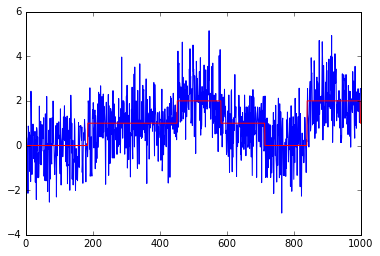

In [412]:
plt.plot(X,color='b')
plt.plot(Yhat,color='r')